In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

from tensorflow import keras

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

LEVEL = 51
SEED = 1584353120

In [2]:
df=pd.read_csv('data/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
total_students = df.shape[0]

# Min number of points to pass, can be changed

students_passing_all_subjects = df[(df['math score'] > LEVEL) &
                                (df['writing score'] > LEVEL) & 
                                (df['reading score'] > LEVEL)].shape[0]
#probability_passing_all_the_subjects = (students_passing_all_subjects/total_students)*100

def result_of_exam( math, writing, reading):
  if(math > LEVEL and writing > LEVEL and reading > LEVEL):
    return 'P'
  else:
    return 'F'

df["Pass/Fail"] = df.apply(lambda x: result_of_exam(x['math score'],
                                                    x['writing score'],
                                                    x['reading score']), axis=1)  

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Pass/Fail
0,female,group B,bachelor's degree,standard,none,72,72,74,P
1,female,group C,some college,standard,completed,69,90,88,P
2,female,group B,master's degree,standard,none,90,95,93,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,F
4,male,group C,some college,standard,none,76,78,75,P


In [6]:
y=df['Pass/Fail']
lb=LabelEncoder()
y = lb.fit_transform(y)
X=df[['gender','race/ethnicity','parental level of education','lunch','test preparation course', 'Pass/Fail']]

In [7]:
# Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3,random_state=SEED)

def encode_features(df_train, df_test):
  features = ['gender', 'race/ethnicity', 'parental level of education',
              'lunch', 'test preparation course', 'Pass/Fail']
  df_combined = pd.concat([df_train[features], df_test[features]])

  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(df_combined[feature])
    df_train[feature] = le.transform(df_train[feature])
    df_test[feature] = le.transform(df_test[feature])
  return df_train, df_test

X_train, X_valid = encode_features(X_train, X_valid)
#feature importances for better visualization
X_fifbv = [X_train, X_valid]
X_fin = pd.concat(X_fifbv)
y=X_fin.iloc[:,-1] 

X_fin = X_fin.drop('Pass/Fail', axis=1)

X_fin.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
598,0,3,2,1,1
689,1,4,4,0,1
123,1,3,2,0,1
756,1,3,4,1,1
694,0,2,5,1,1


In [8]:
def plot_model(history):
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [9]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_fin, y, validation_split=0.3, epochs=100, batch_size=64)
predictions = model.predict(X_fin)

Epoch 1/100
11/11 [==============================] - 1s 16ms/step - loss: 0.6345 - accuracy: 0.6329 - val_loss: 0.5829 - val_accuracy: 0.7133
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 0.5683 - accuracy: 0.7571 - val_loss: 0.5513 - val_accuracy: 0.7600
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 0.5461 - accuracy: 0.7757 - val_loss: 0.5382 - val_accuracy: 0.7733
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 0.5353 - accuracy: 0.7786 - val_loss: 0.5306 - val_accuracy: 0.7733
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 0.5276 - accuracy: 0.7786 - val_loss: 0.5247 - val_accuracy: 0.7733
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5207 - accuracy: 0.7771 - val_loss: 0.5201 - val_accuracy: 0.7733
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5154 - accuracy: 0.7786 - val_loss: 0.5162 - val_accuracy: 0.7733
Epoch 8/100


Epoch 59/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4612 - accuracy: 0.7786 - val_loss: 0.4953 - val_accuracy: 0.8000
Epoch 60/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4623 - accuracy: 0.7814 - val_loss: 0.4955 - val_accuracy: 0.8000
Epoch 61/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4607 - accuracy: 0.7829 - val_loss: 0.4941 - val_accuracy: 0.7933
Epoch 62/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4617 - accuracy: 0.7800 - val_loss: 0.4951 - val_accuracy: 0.8000
Epoch 63/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4607 - accuracy: 0.7843 - val_loss: 0.4953 - val_accuracy: 0.8000
Epoch 64/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4605 - accuracy: 0.7786 - val_loss: 0.4946 - val_accuracy: 0.8000
Epoch 65/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4610 - accuracy: 0.7757 - val_loss: 0.4942 - val_accuracy: 0.7933
Epoch 

In [ ]:
plot_model(history)

Epoch 1/100
11/11 [==============================] - 1s 12ms/step - loss: 0.6557 - accuracy: 0.6414 - val_loss: 0.5942 - val_accuracy: 0.7733
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 0.5677 - accuracy: 0.7786 - val_loss: 0.5527 - val_accuracy: 0.7733
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 0.5401 - accuracy: 0.7786 - val_loss: 0.5378 - val_accuracy: 0.7733
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5277 - accuracy: 0.7786 - val_loss: 0.5296 - val_accuracy: 0.7733
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 0.5182 - accuracy: 0.7786 - val_loss: 0.5239 - val_accuracy: 0.7733
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5116 - accuracy: 0.7786 - val_loss: 0.5198 - val_accuracy: 0.7733
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 0.5061 - accuracy: 0.7786 - val_loss: 0.5169 - val_accuracy: 0.7733
Epoch 8/100


Epoch 59/100
11/11 [==============================] - 0s 4ms/step - loss: 0.4518 - accuracy: 0.7843 - val_loss: 0.4962 - val_accuracy: 0.7800
Epoch 60/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4514 - accuracy: 0.7900 - val_loss: 0.5022 - val_accuracy: 0.7833
Epoch 61/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4519 - accuracy: 0.7843 - val_loss: 0.4956 - val_accuracy: 0.7800
Epoch 62/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4535 - accuracy: 0.7829 - val_loss: 0.4974 - val_accuracy: 0.7833
Epoch 63/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4522 - accuracy: 0.7757 - val_loss: 0.4981 - val_accuracy: 0.7833
Epoch 64/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4527 - accuracy: 0.7814 - val_loss: 0.4965 - val_accuracy: 0.7800
Epoch 65/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4509 - accuracy: 0.7857 - val_loss: 0.4967 - val_accuracy: 0.7800
Epoch 

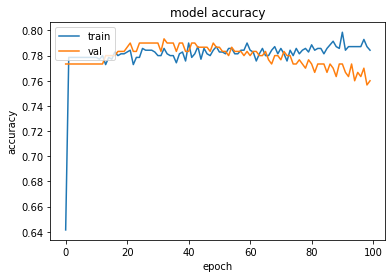

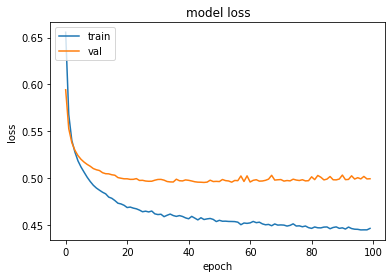

In [12]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_fin, y, validation_split=0.3, epochs=100, batch_size=64)
predictions = model.predict(X_fin)

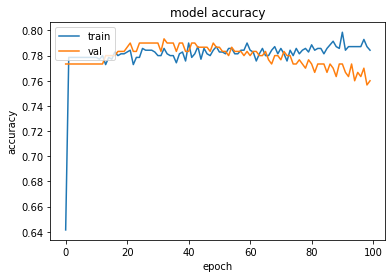

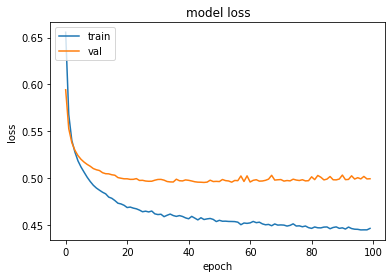

In [13]:
plot_model(history)